In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [133]:
df = pd.read_csv(r'/content/train.csv')

In [134]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


"Data Exploration, Clean and Handling"

In [135]:
df.shape

(103904, 25)

Unnamed, Id column are not necessary

In [136]:
df.drop(columns= ['Unnamed: 0', 'id'], inplace= True)

In [137]:
len(df.columns)

23

In [138]:
df.isnull().sum()

,0
Gender,0
Customer Type,0
Age,0
Type of Travel,0
Class,0
Flight Distance,0
Inflight wifi service,0
Departure/Arrival time convenient,0
Ease of Online booking,0
Gate location,0


In [139]:
df.duplicated().sum()

np.int64(0)

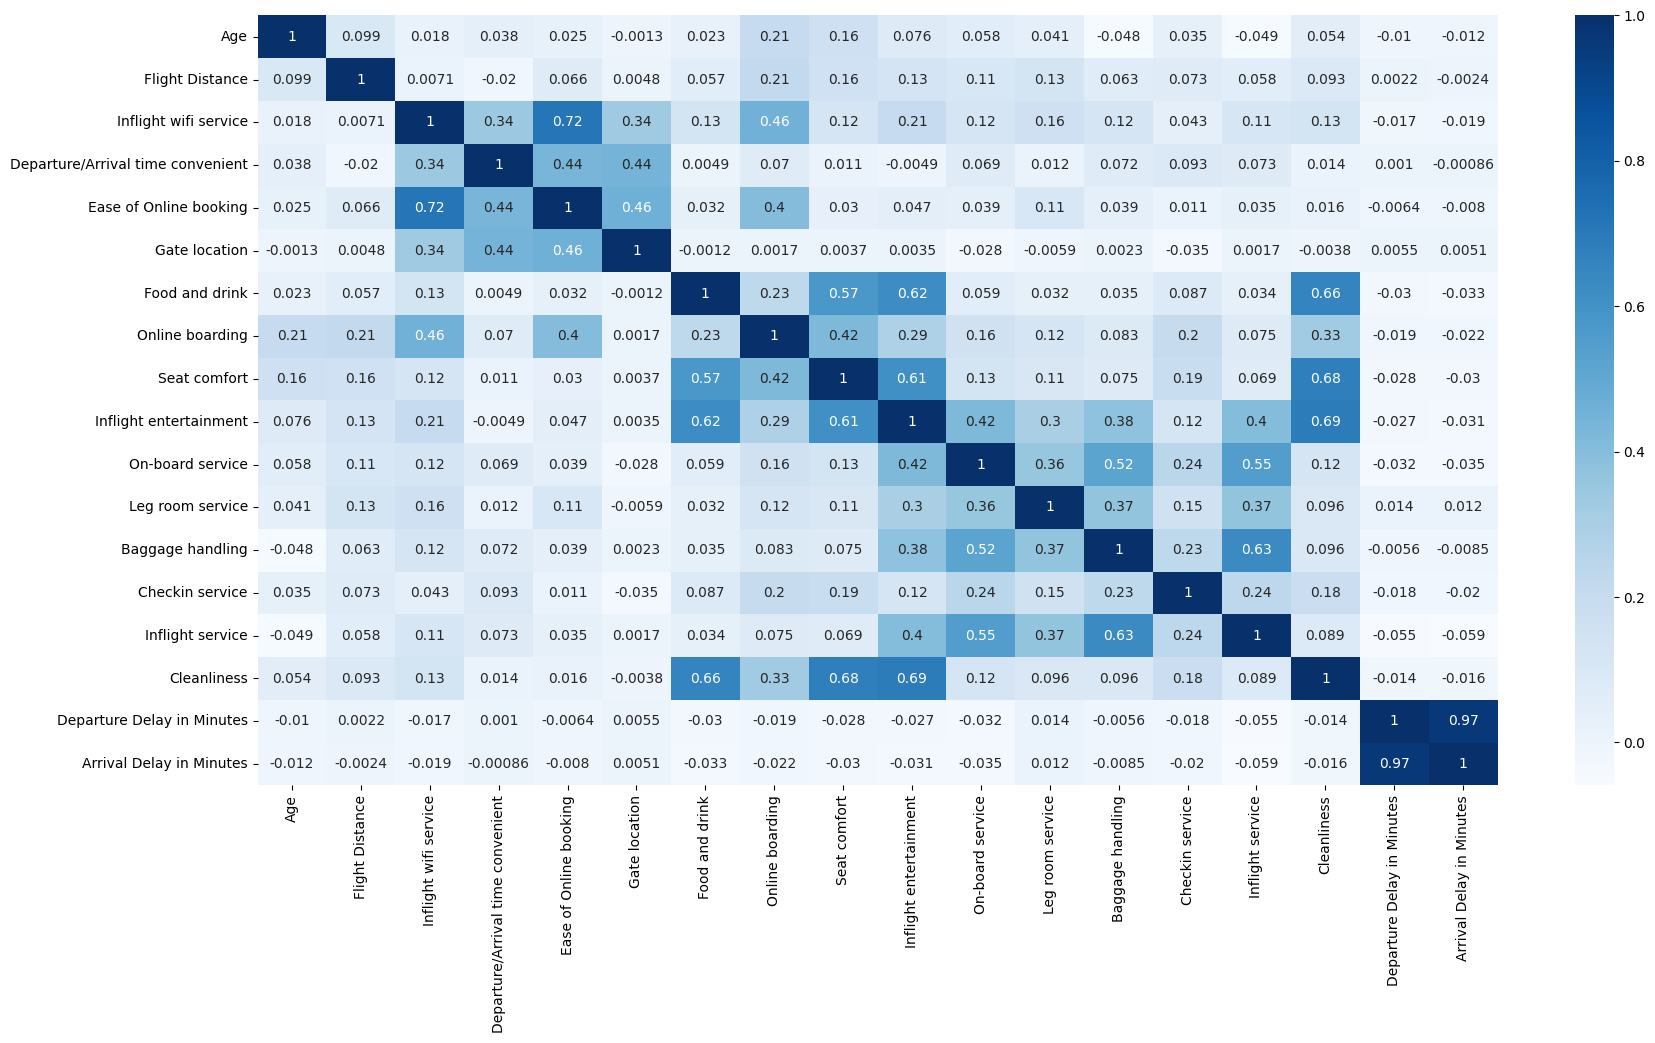

In [140]:
numeric_df = df.select_dtypes(include= 'number')
corr = numeric_df.corr()
plt.figure(figsize= (20,10))
sns.heatmap(corr, annot= True, cmap="Blues")
plt.show()

"departure delay and arrival delay are highly correlated"

In [141]:
df.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


"Insights"


1.   Minimum arrival delay time is 0 and max arrival delay time is 1584.
2.   The Shortest flight distance is 31 and longest 4983.
3.  The min departure delay is 0 and maximum is 1592.
4.  It is look like the outliers due to have too difference in the third quartile and maximum value.




"Check for Outliers"

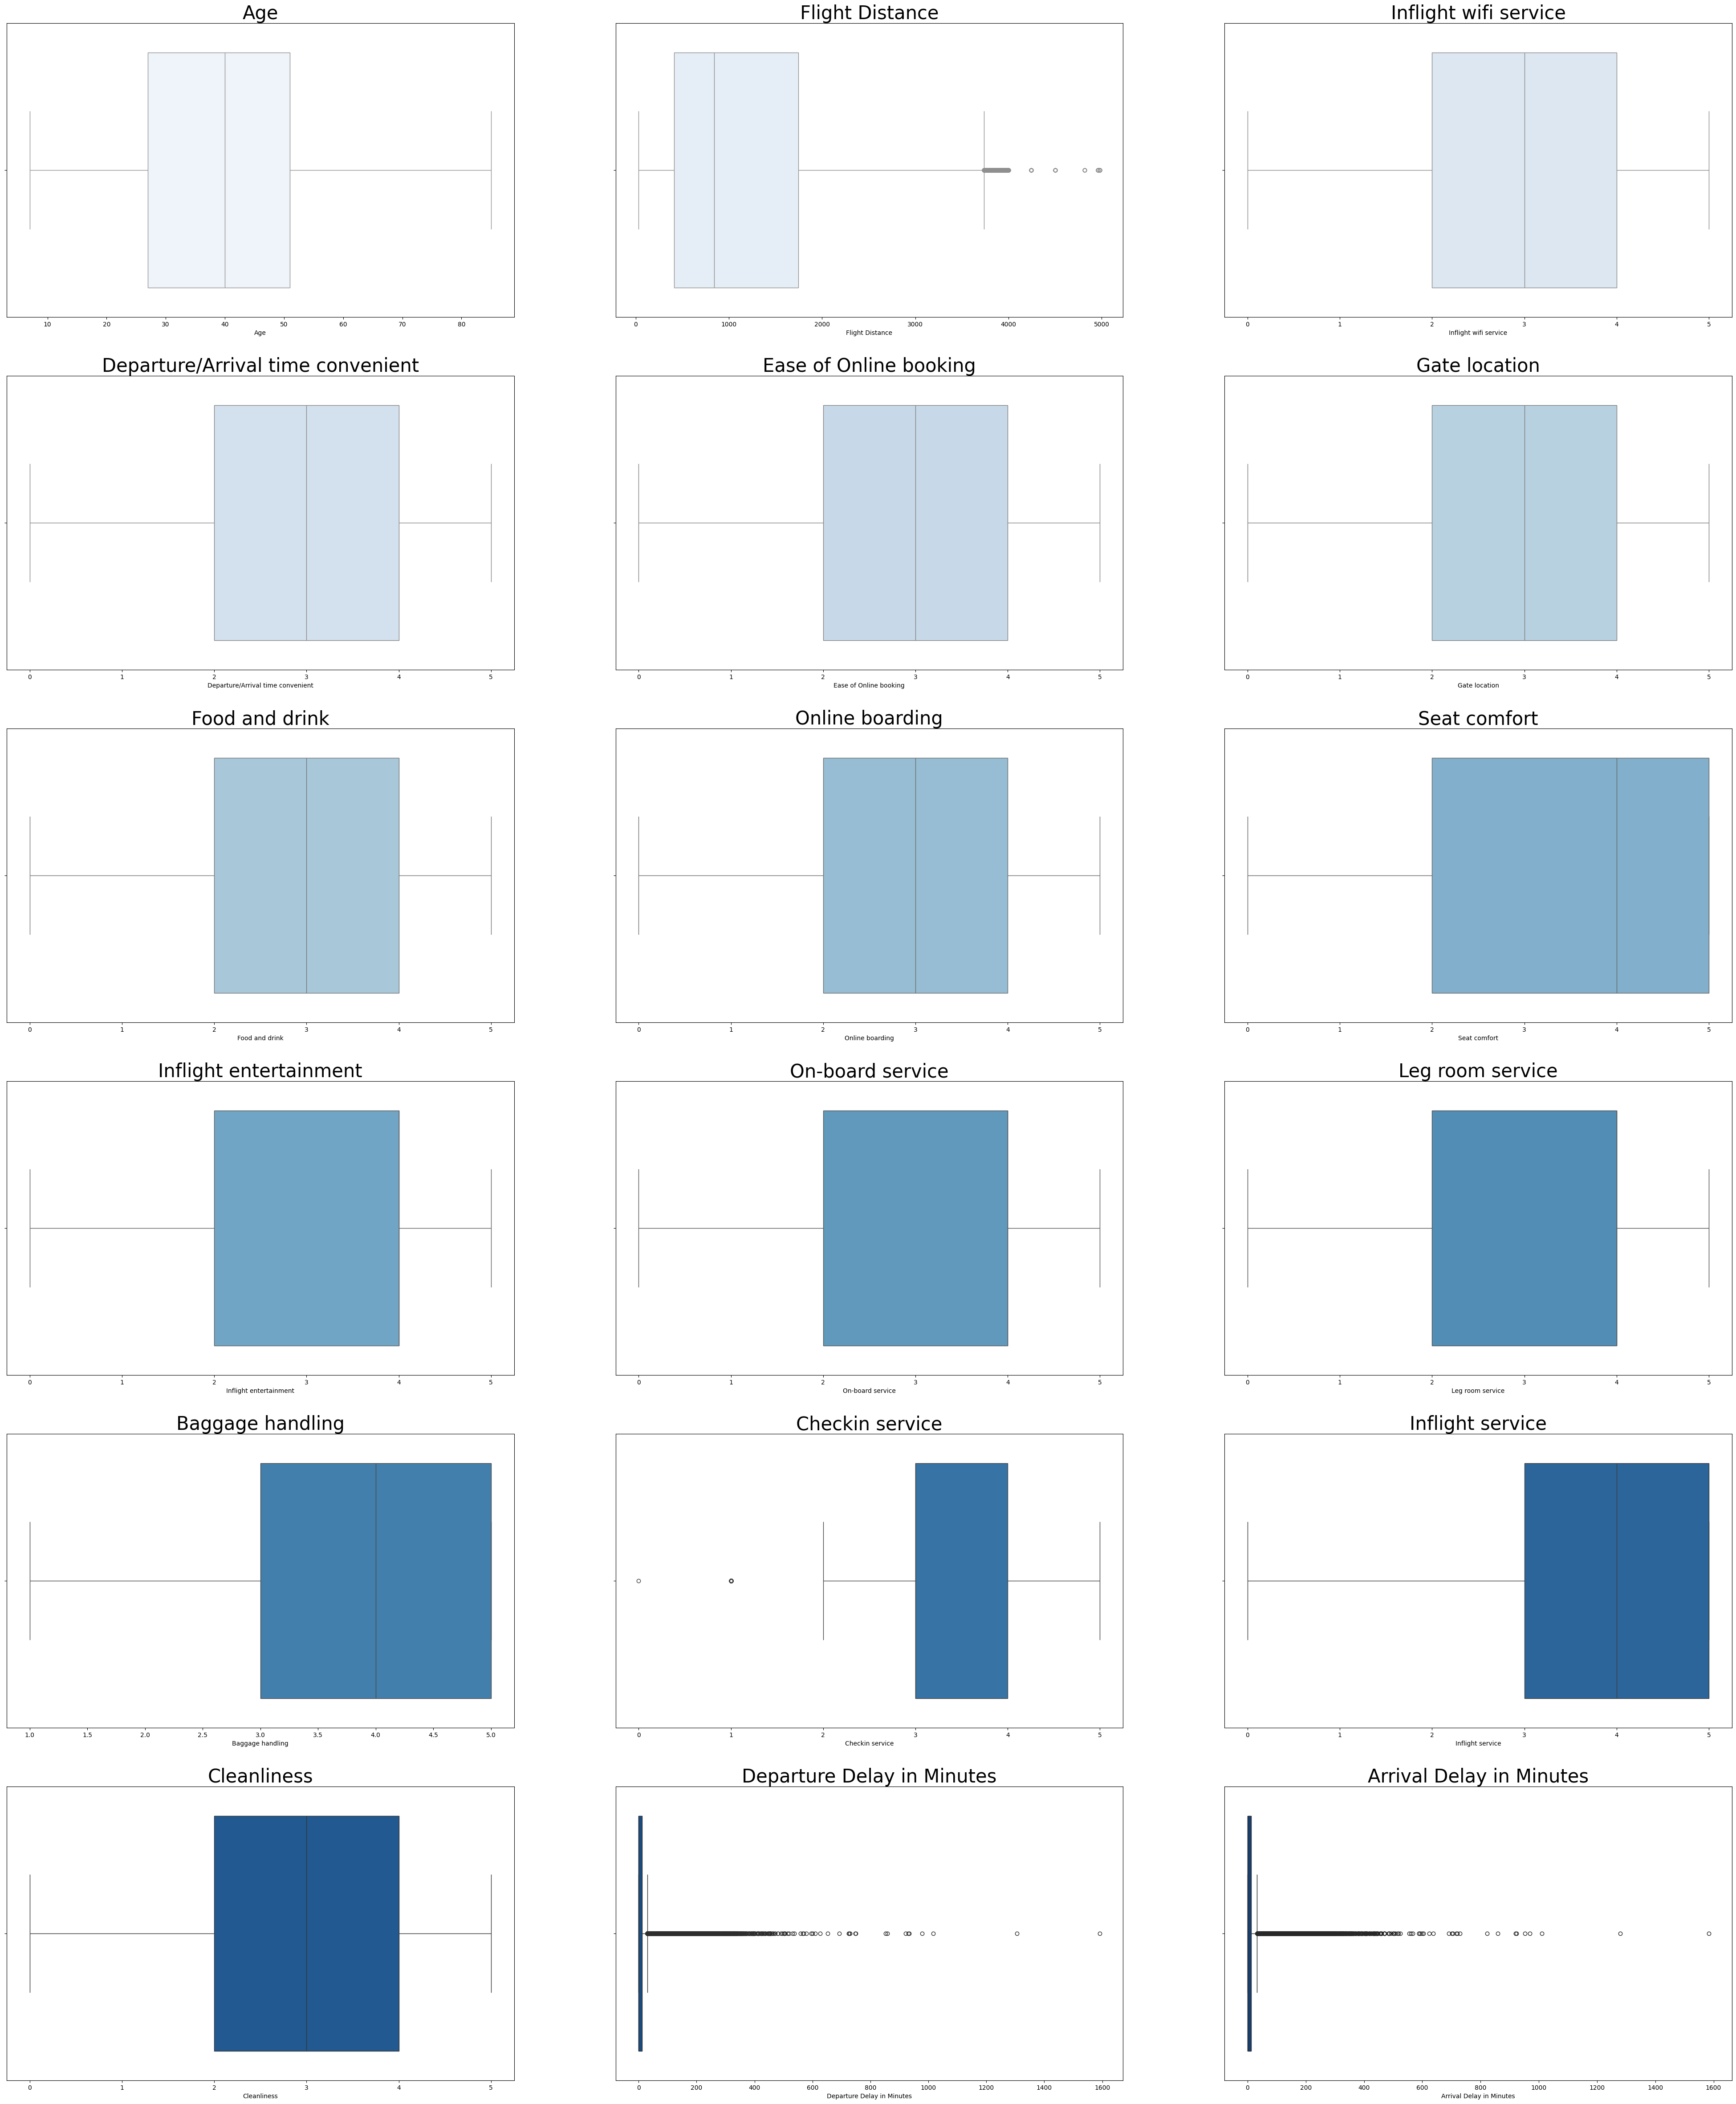

In [142]:
numerical = df.select_dtypes(include = ['int', 'float'])
blue_palette= sns.color_palette('Blues', n_colors=len(numerical.columns))

fig,axes = plt.subplots(6,3, figsize= (50,60))
axes = axes.flatten()

for i, col in enumerate(numerical.columns):
  sns.boxplot(x=df[col], ax= axes[i], color= blue_palette[i])
  axes[i].set_title(col, fontsize=30)

plt.show()

"These columns have the Outliers"
1. Departure Delay (too much)
2. Arrival Delay (too much)
3. Check in service (very less)
4. Flight Distance (Moderate)

In [143]:
# Handle Outliers

def handle_outliers(df, columns):
  for col in columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound= Q1 - (1.5 * IQR)
    upper_bound= Q3 + (1.5 * IQR)
    df[col] = df[col].clip(lower= lower_bound, upper= upper_bound)
  return df

columns_to_handle = ['Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'Checkin service']
df = handle_outliers(df, columns_to_handle)

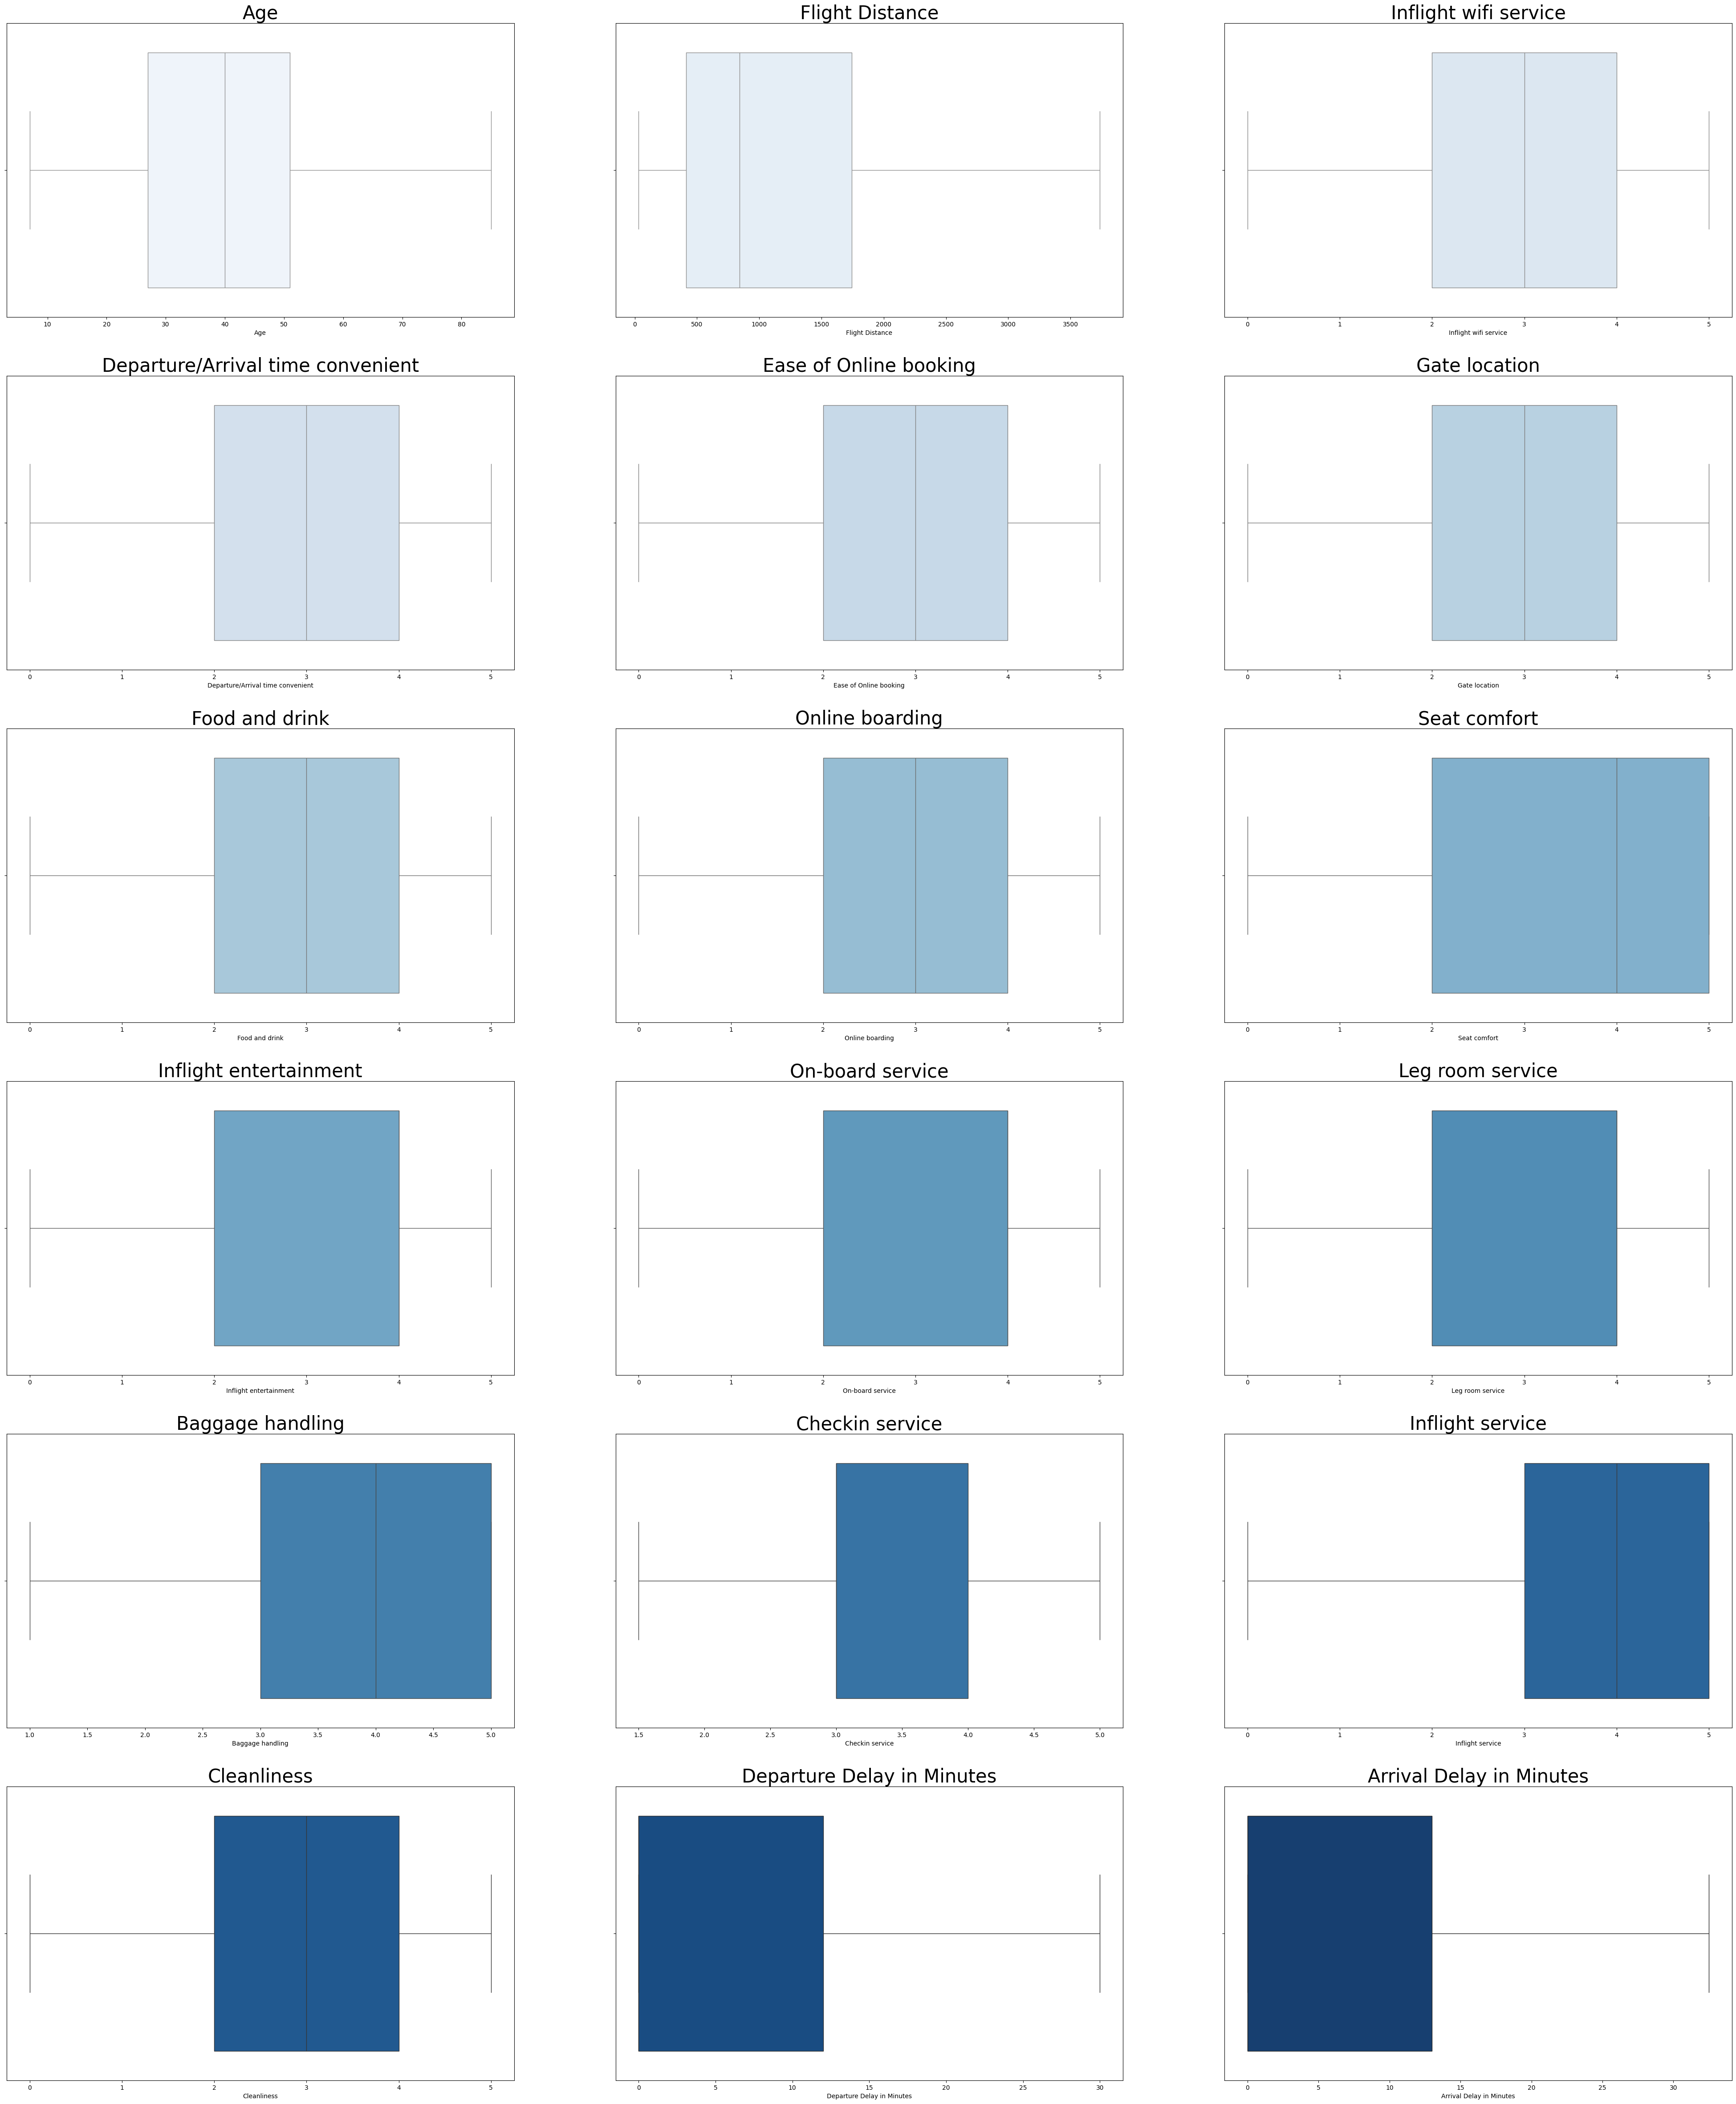

In [144]:
numerical = df.select_dtypes(include = ['int', 'float'])
blue_palette= sns.color_palette('Blues', n_colors=len(numerical.columns))

fig,axes = plt.subplots(6,3, figsize= (50,60))
axes = axes.flatten()

for i, col in enumerate(numerical.columns):
  sns.boxplot(x=df[col], ax= axes[i], color= blue_palette[i])
  axes[i].set_title(col, fontsize=30)

plt.show()


In [145]:
df.shape

(103904, 23)

"Handle null values with arrival delay in Minutes"

In [146]:
df['Arrival Delay in Minutes']=df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].median())

In [147]:
df.isnull().sum()

,0
Gender,0
Customer Type,0
Age,0
Type of Travel,0
Class,0
Flight Distance,0
Inflight wifi service,0
Departure/Arrival time convenient,0
Ease of Online booking,0
Gate location,0


3. EDA

In [148]:
new_df = df.copy()

In [149]:
new_df.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [150]:
df['Gender'].nunique()

2

In [151]:
columns_with_six_categories = new_df.columns[new_df.nunique()==0]
columns_with_six_categories

Index([], dtype='object')

In [152]:
new_df['Cleanliness'].value_counts()

,count
Cleanliness,
4,27179
3,24574
5,22689
2,16132
1,13318
0,12


In [153]:
ordinal_mapping = {
    0: "Very poor",
    1: "Poor",
    2: "Average",
    3: "Good",
    4: "Excellent",
    5: "Outstanding"
}


In [154]:
new_df[columns_with_six_categories]=new_df[columns_with_six_categories].applymap(lambda x: ordinal_mapping.get(x, x))

In [155]:
new_df.head(1)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460.0,3,4,3,1,...,5,4,3,4,4.0,5,5,25,18.0,neutral or dissatisfied


In [156]:
df["Baggage handling"].value_counts()

,count
Baggage handling,
4,37383
5,27131
3,20632
2,11521
1,7237


In [157]:
mapping  ={
    1: "Very Poor",
    2: "Poor",
    3: "Average",
    4: "Good",
    5: "Excellent",

}

In [158]:
new_df["Baggage handling"]=new_df["Baggage handling"].apply(lambda x: ordinal_mapping.get(x,x))

In [159]:
new_df.head(1)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460.0,3,4,3,1,...,5,4,3,Excellent,4.0,5,5,25,18.0,neutral or dissatisfied


In [160]:
df['Checkin service'].value_counts()

,count
Checkin service,
4.0,29055
3.0,28446
5.0,20619
2.0,12893
1.5,12891


In [161]:
mapping = {
    1.5:"Very Poor",
    2.0:"Poor",
    3.0:"Average",
    4.0:"Good",
    5.0:"Excellent"
}

new_df['Checkin service']=new_df['Checkin service'].apply(lambda x: mapping.get(x,x))

In [162]:
new_df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460.0,3,4,3,1,...,5,4,3,Excellent,Good,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235.0,3,2,3,3,...,1,1,5,Good,Very Poor,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142.0,2,2,2,2,...,5,4,3,Excellent,Good,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562.0,2,5,5,5,...,2,2,5,Good,Very Poor,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214.0,3,3,3,3,...,3,3,4,Excellent,Average,3,3,0,0.0,satisfied


"Now All Data is set to EDA"

In [163]:
df.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

"Univariate  EDA"

In [164]:
numerical_columns = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
categorical_columns = ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness']

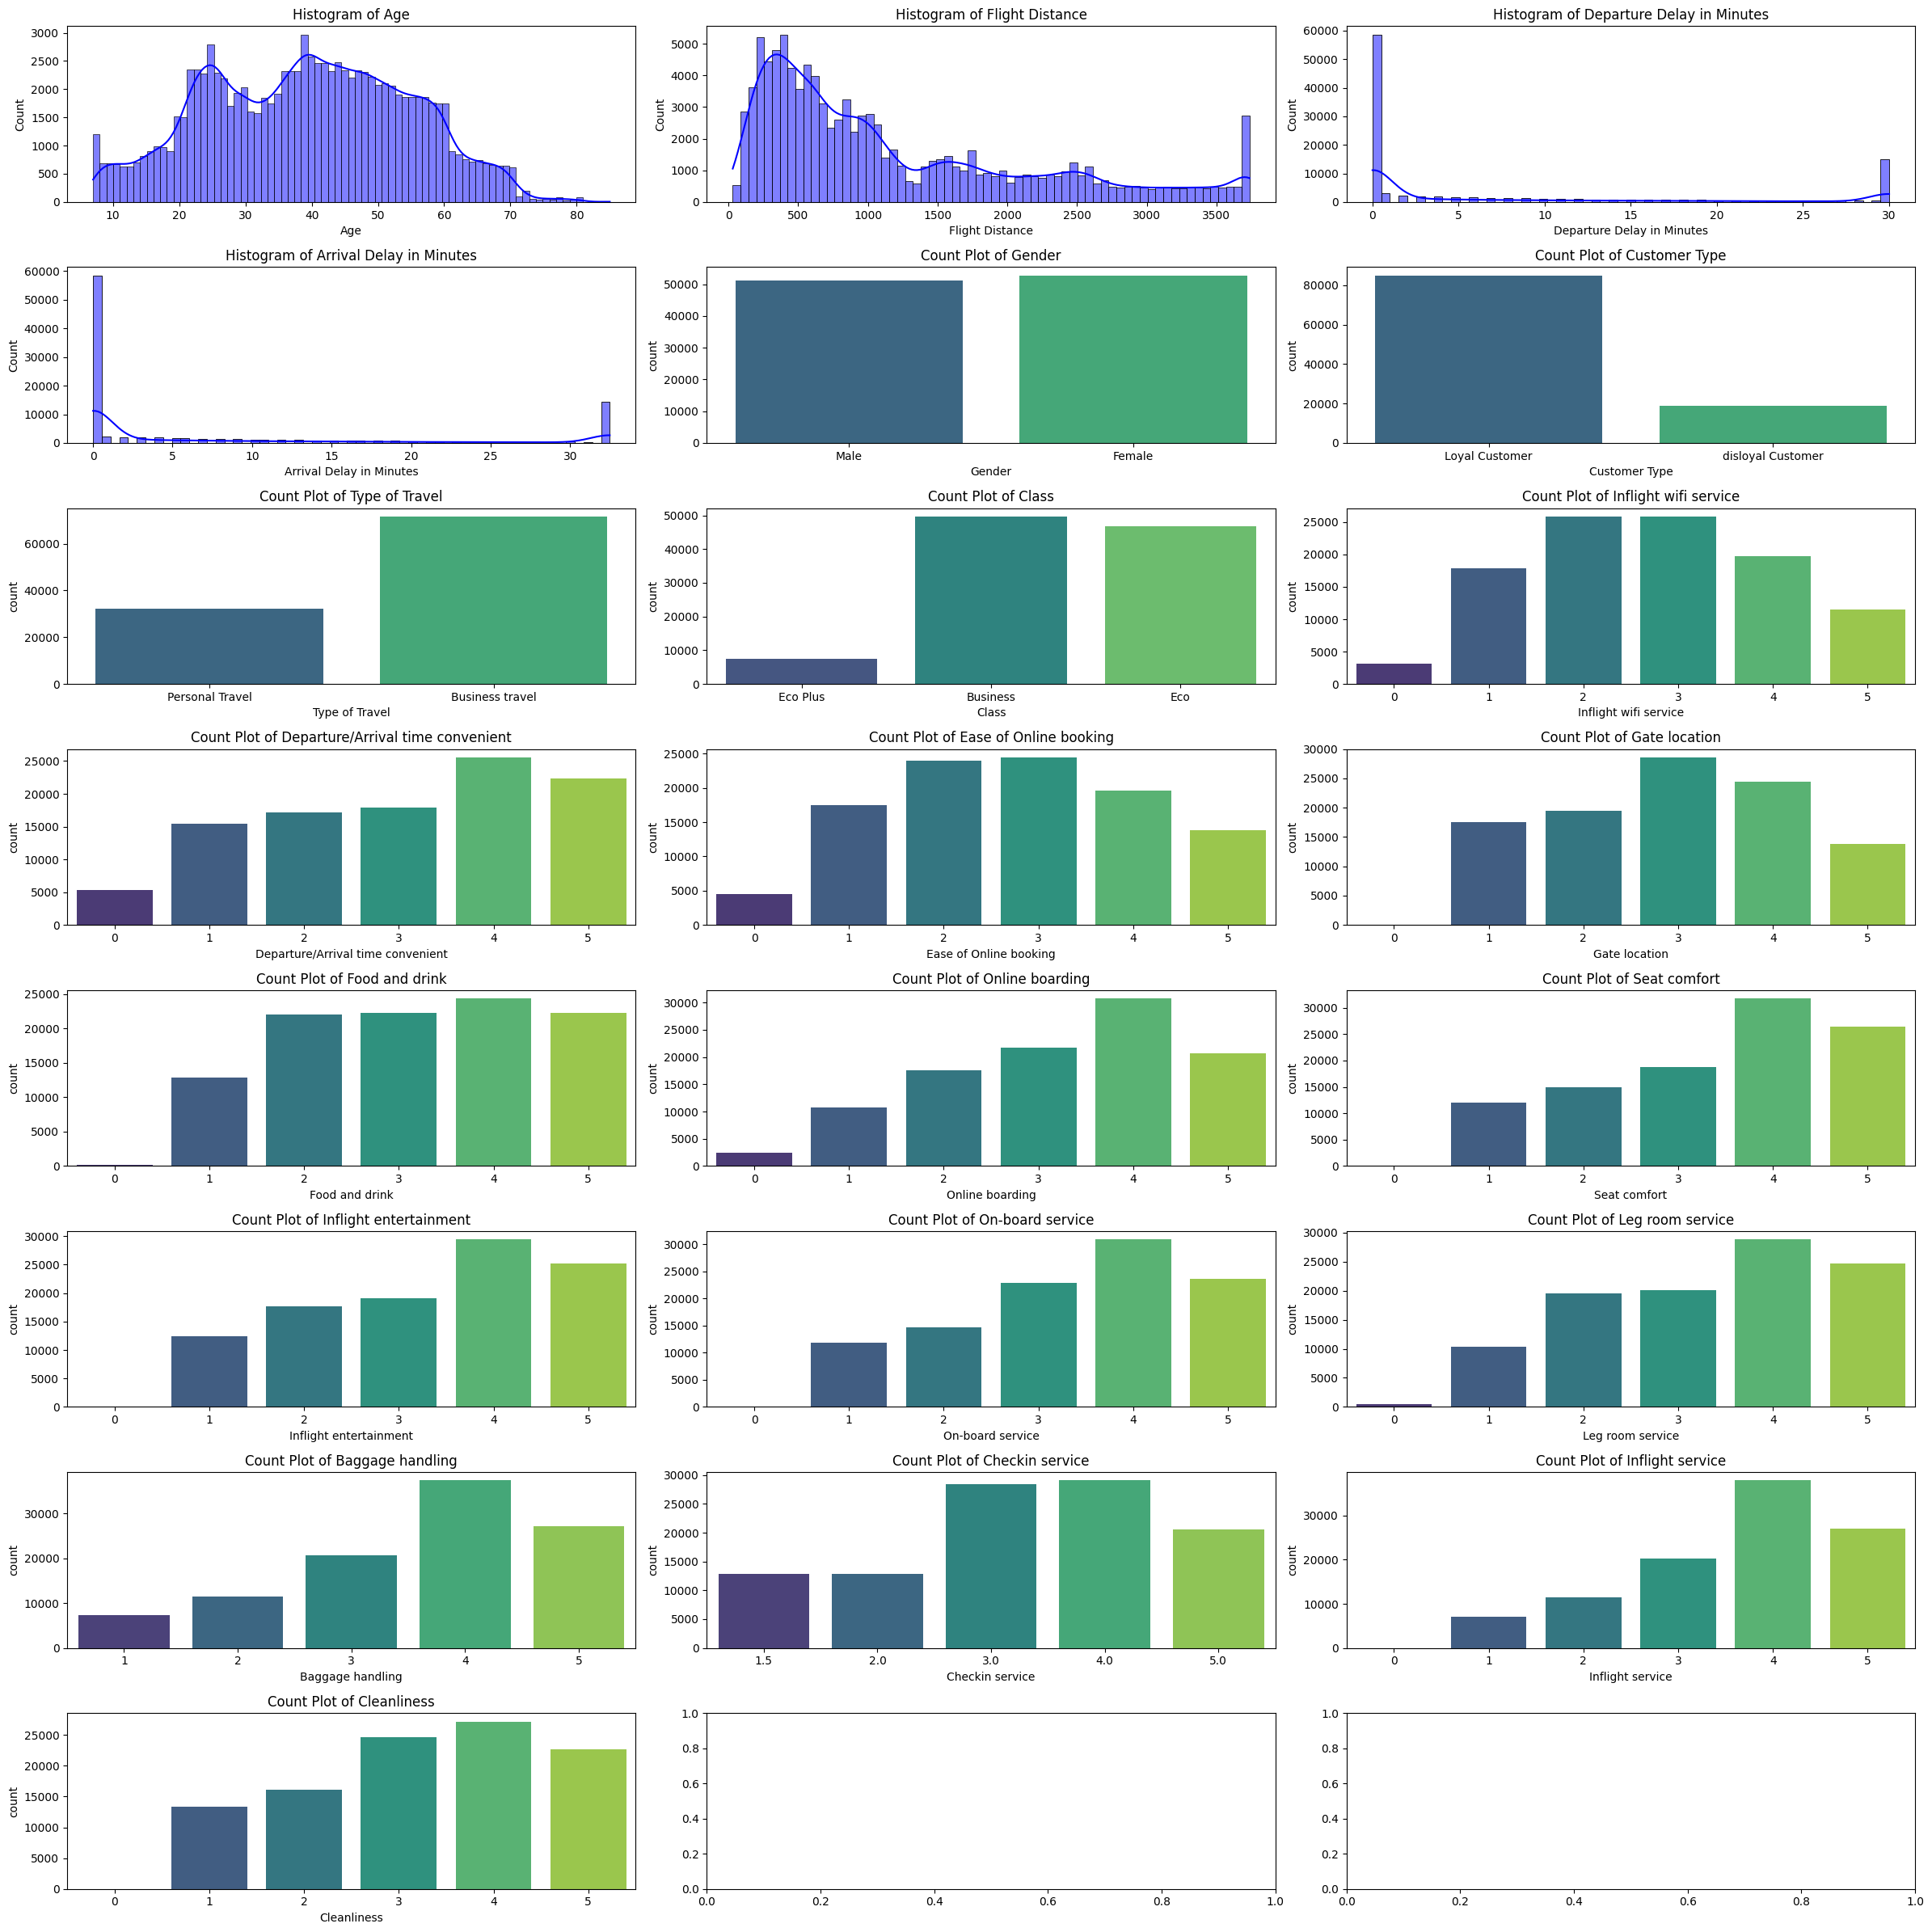

In [165]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows=8, ncols=3, figsize=(24,24))
axes = axes.flatten()

for i , col in enumerate(numerical_columns):
  sns.histplot(df[col], kde=True, ax=axes[i], color='blue')
  axes[i].set_title(f'Histogram of {col}')

for j, col in enumerate(categorical_columns):
  if i+1+j < len(axes):
    sns.countplot(x=df[col], ax=axes[i+1+j], palette='viridis')
    axes[i+1+j].set_title(f'Count Plot of {col}')

plt.tight_layout()
plt.show()

"Bivariate EDA"

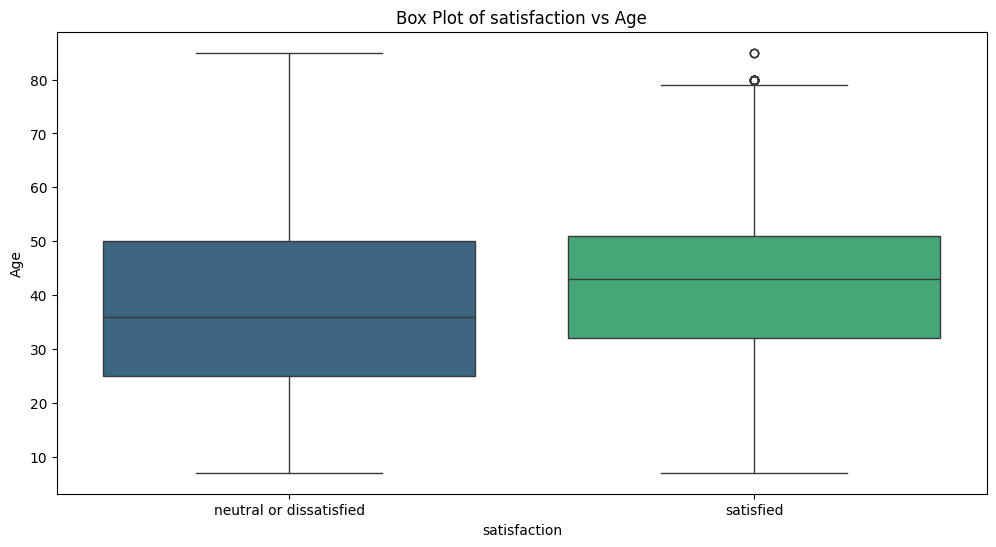

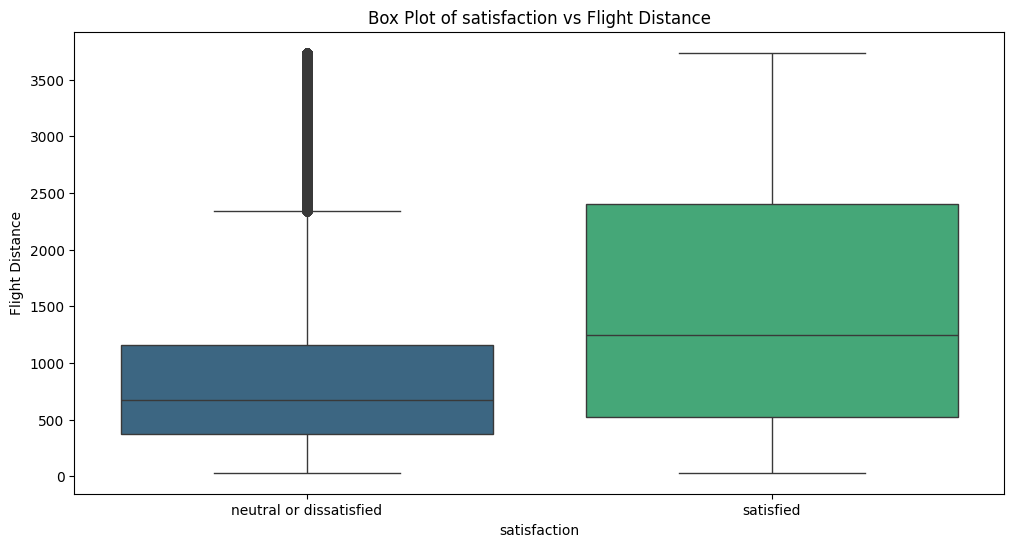

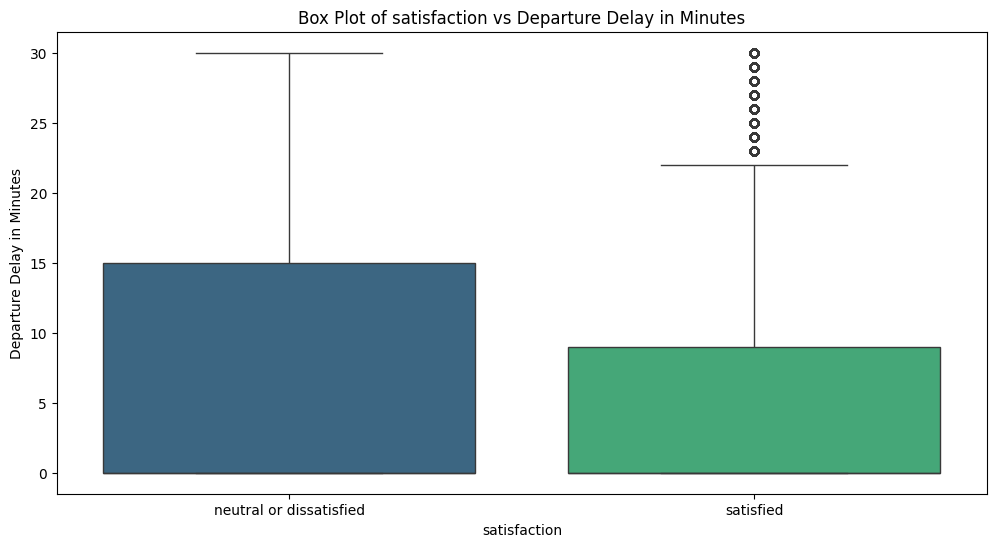

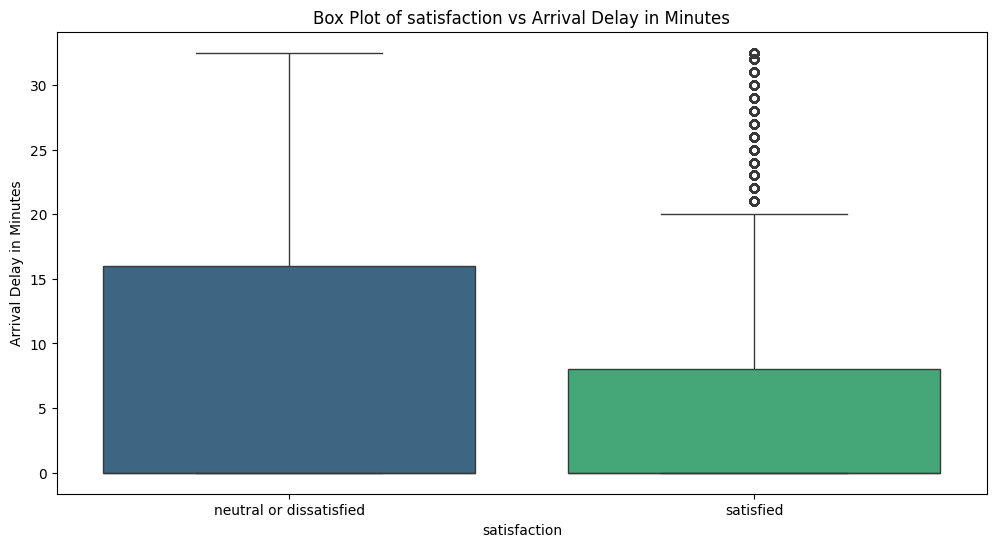

In [166]:
target_column = 'satisfaction'

# Numerical VS Target Columns
for col in numerical_columns:
  plt.figure(figsize=(12,6))
  sns.boxplot(x=df[target_column], y=df[col], palette='viridis')
  plt.title(f'Box Plot of {target_column} vs {col}')
  plt.show()

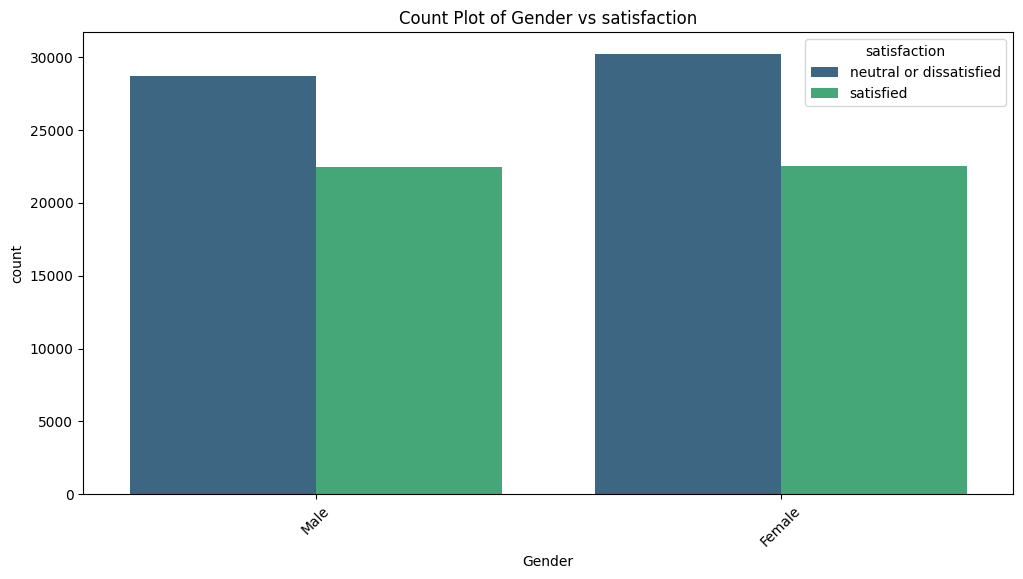

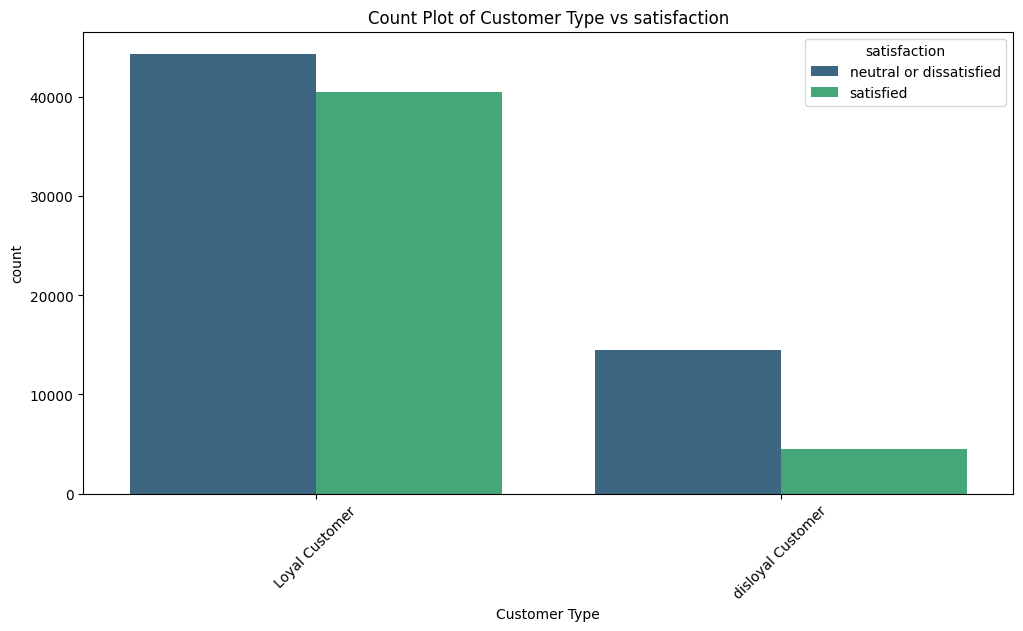

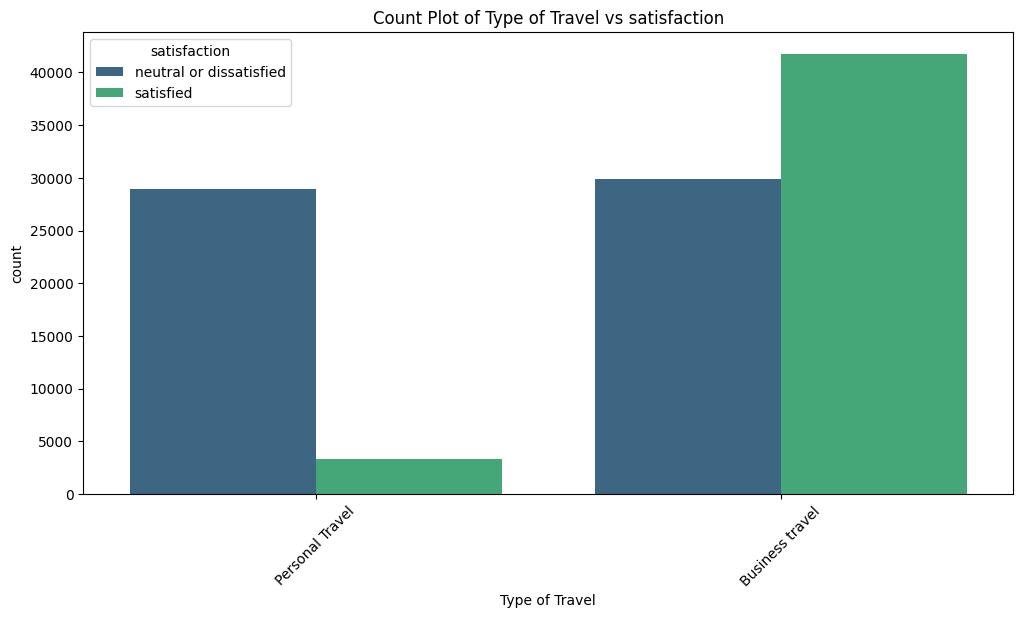

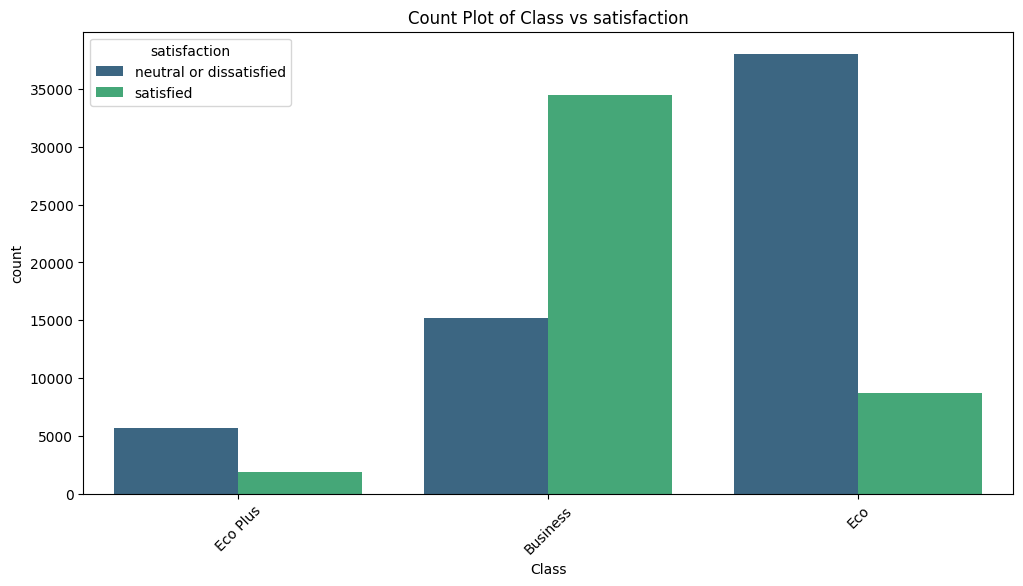

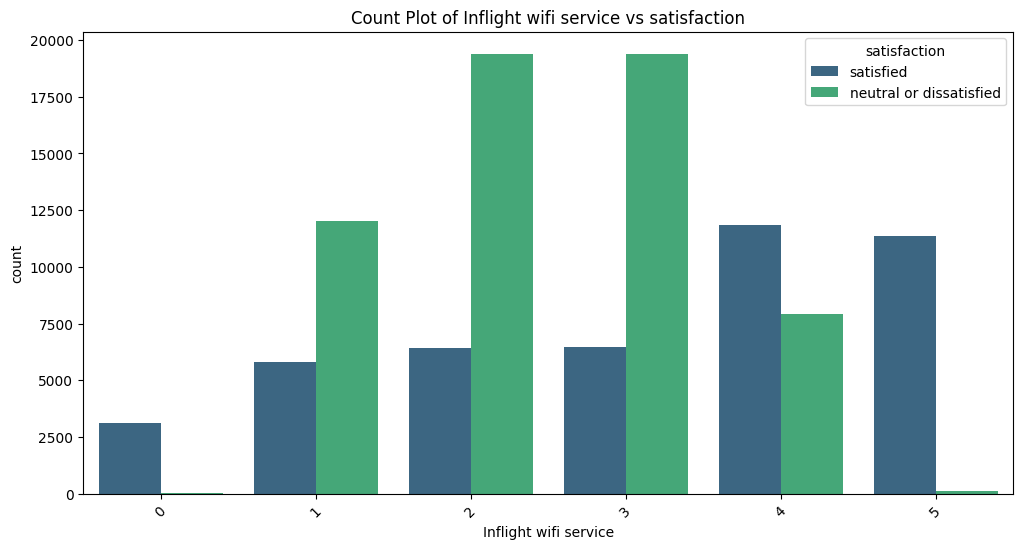

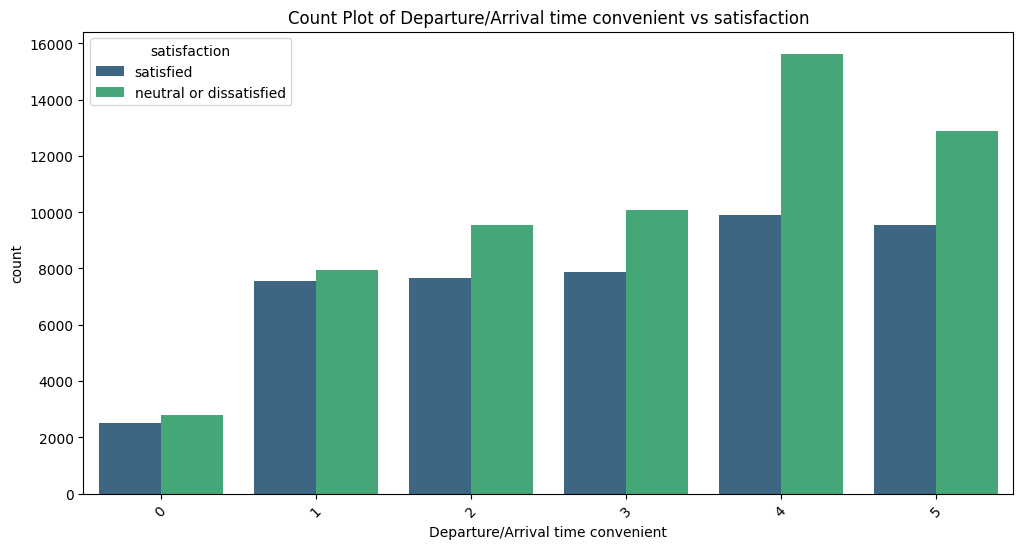

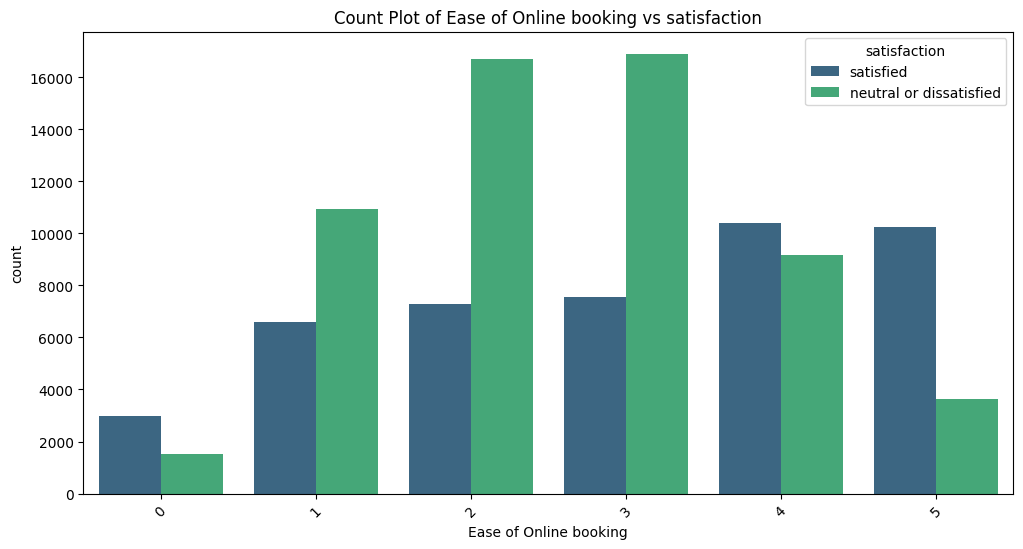

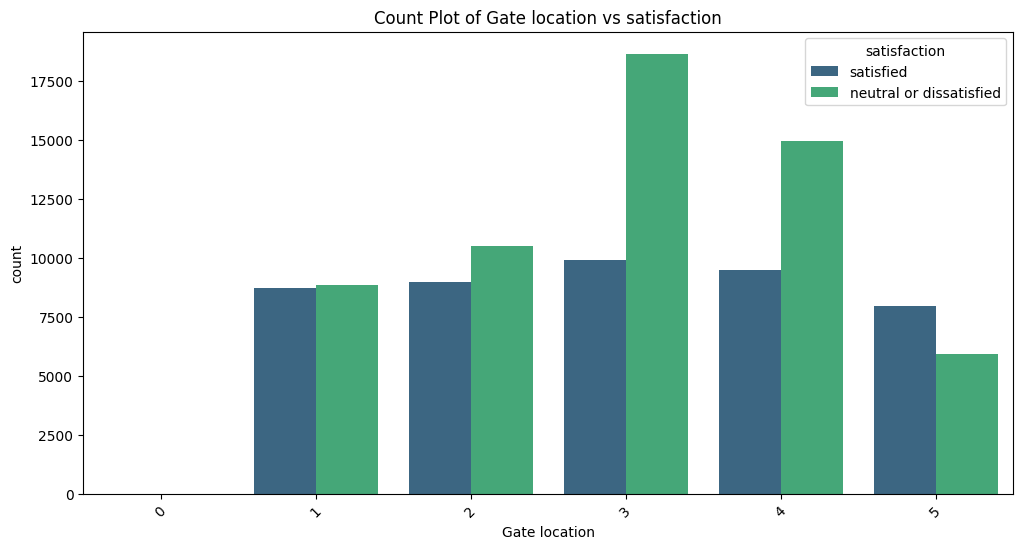

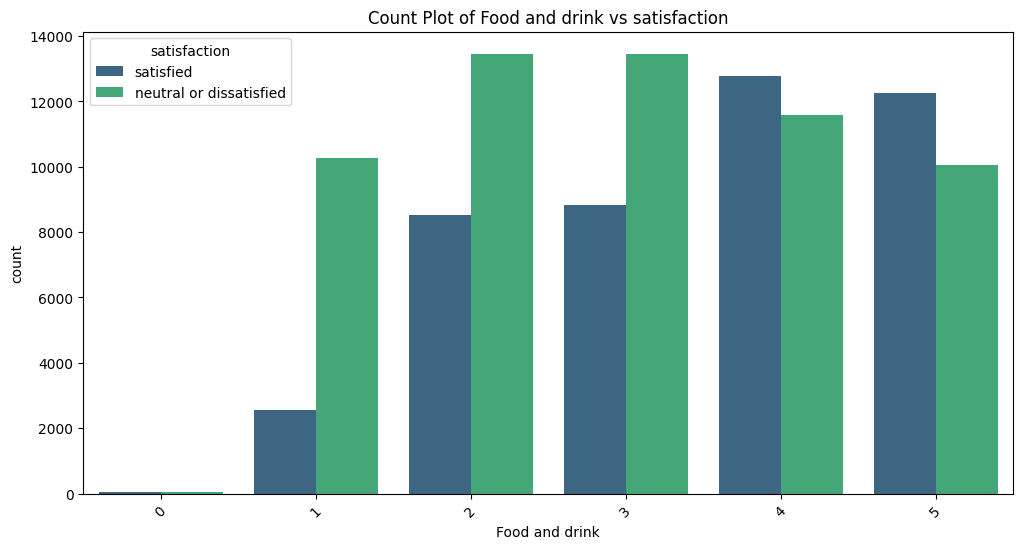

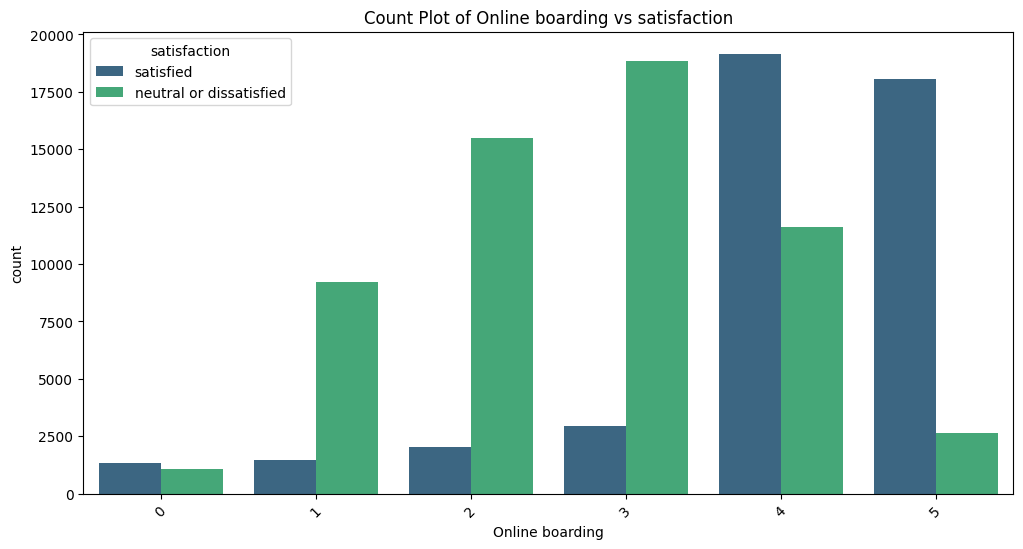

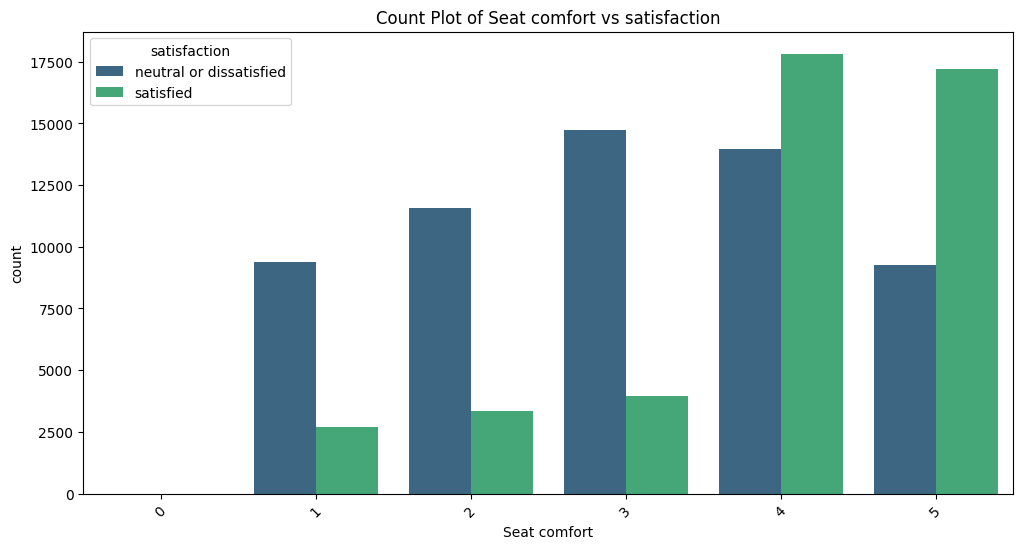

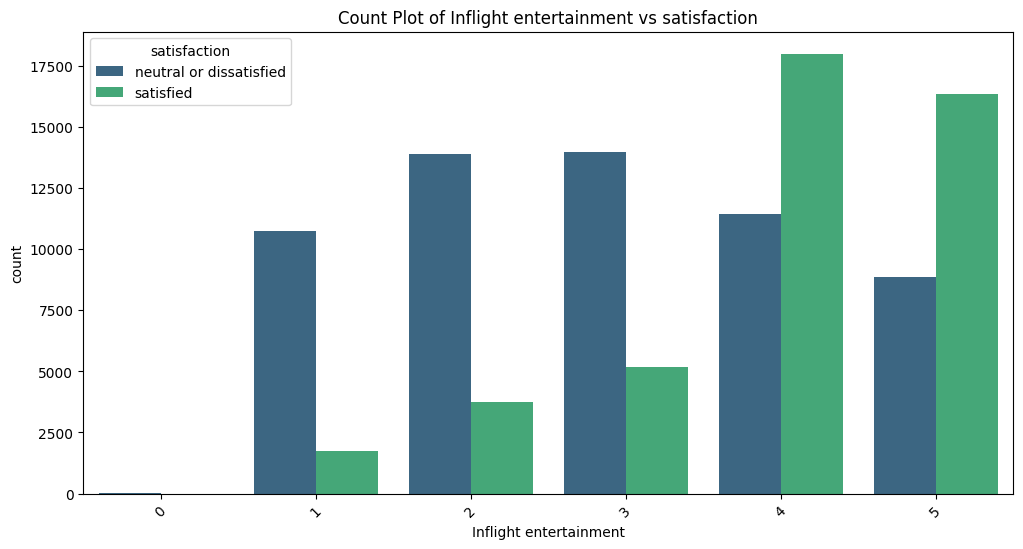

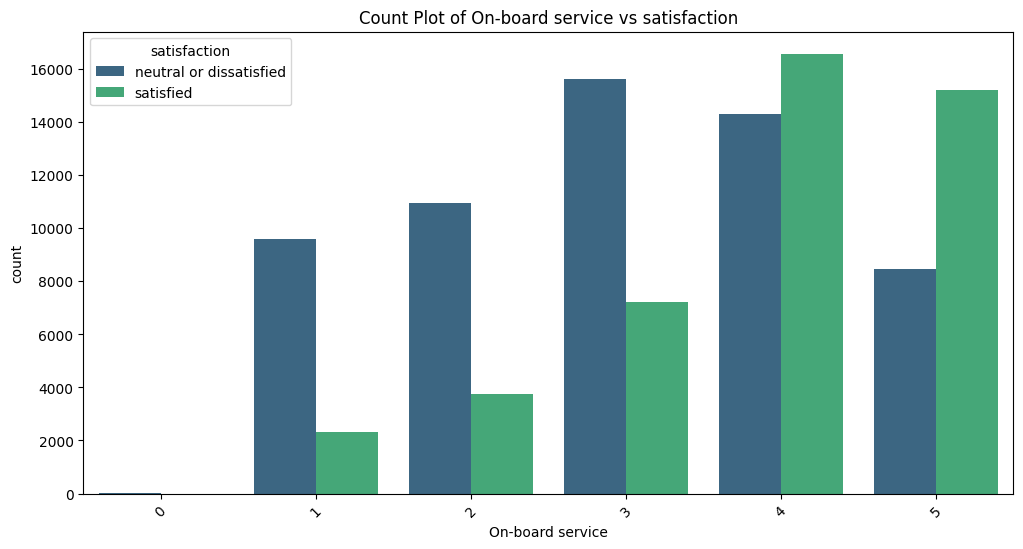

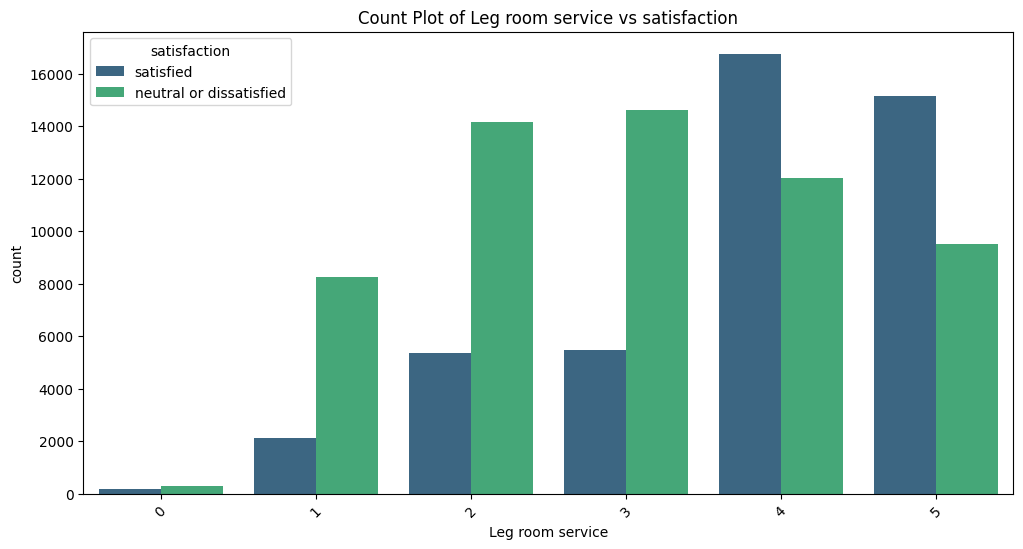

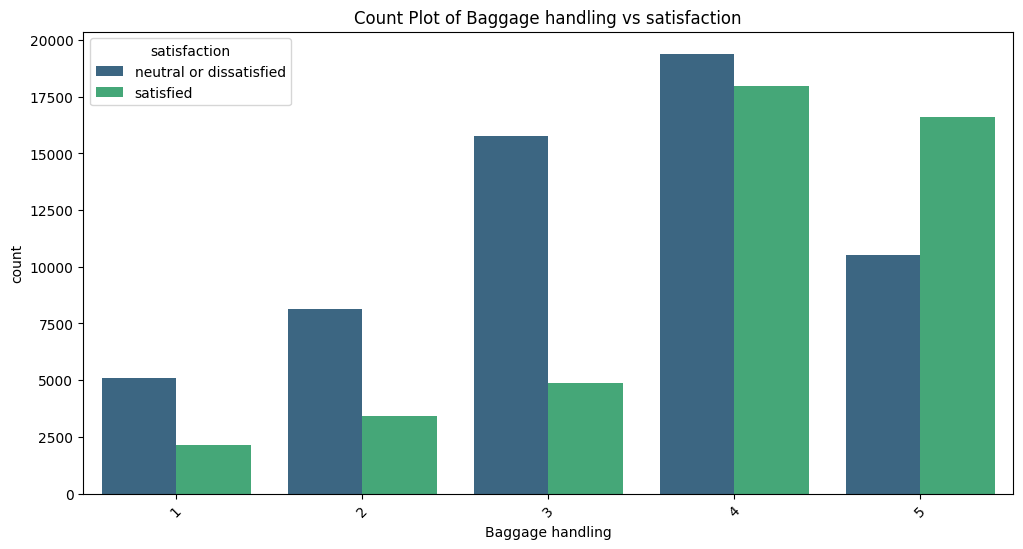

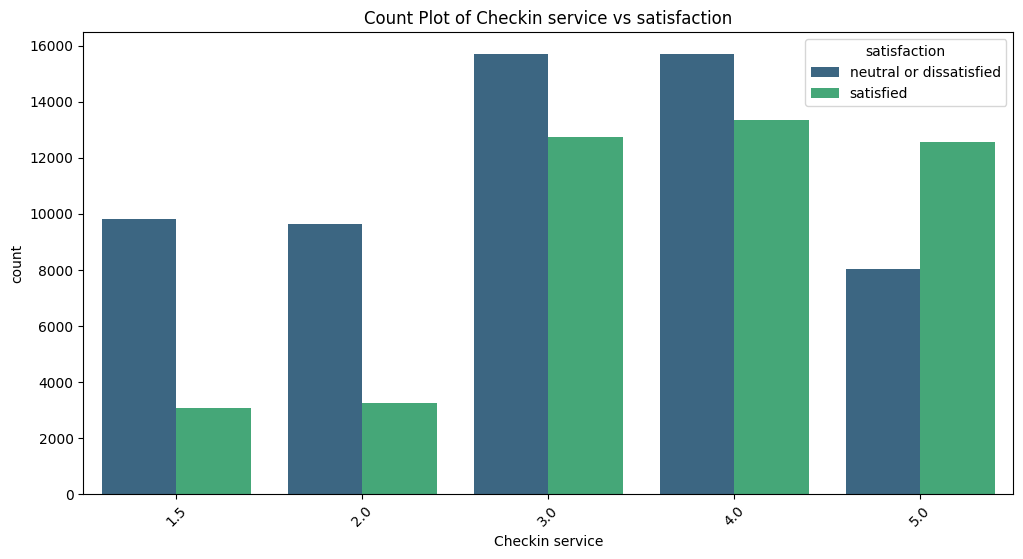

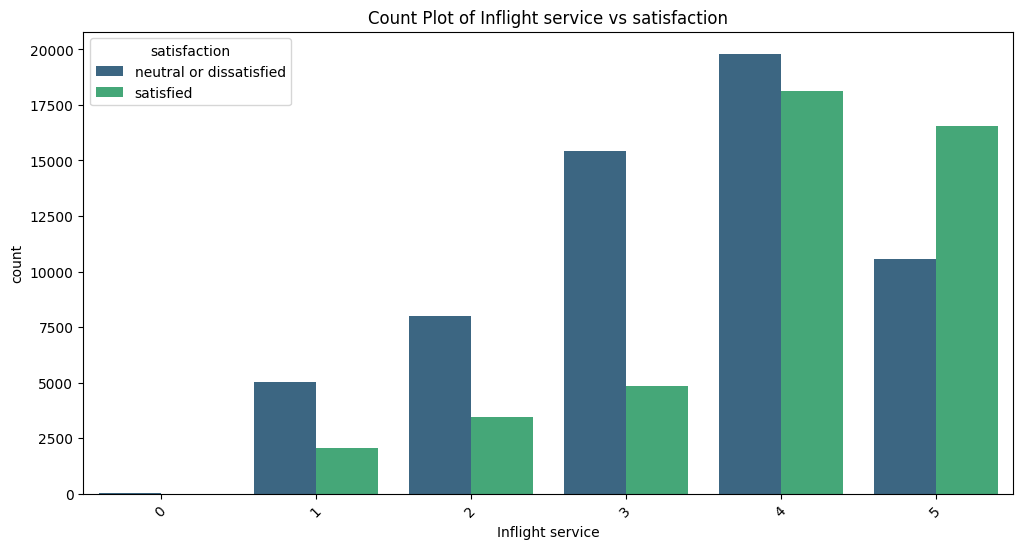

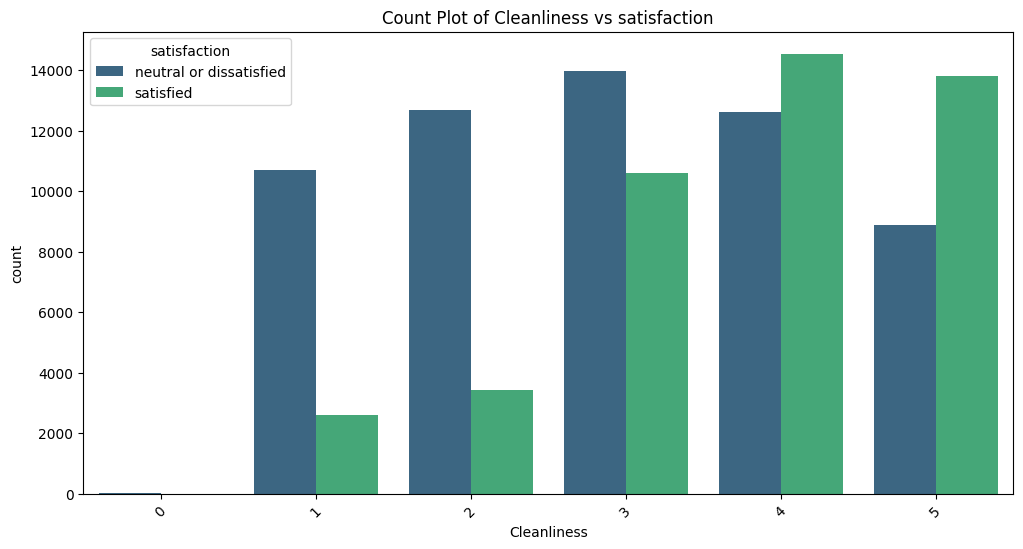

In [167]:
for col in categorical_columns:
  plt.figure(figsize=(12,6))
  sns.countplot(x=df[col], hue=df[target_column], palette='viridis')
  plt.title(f'Count Plot of {col} vs {target_column}')
  plt.xticks(rotation=45)
  plt.show()

"MultiVariate EDA"

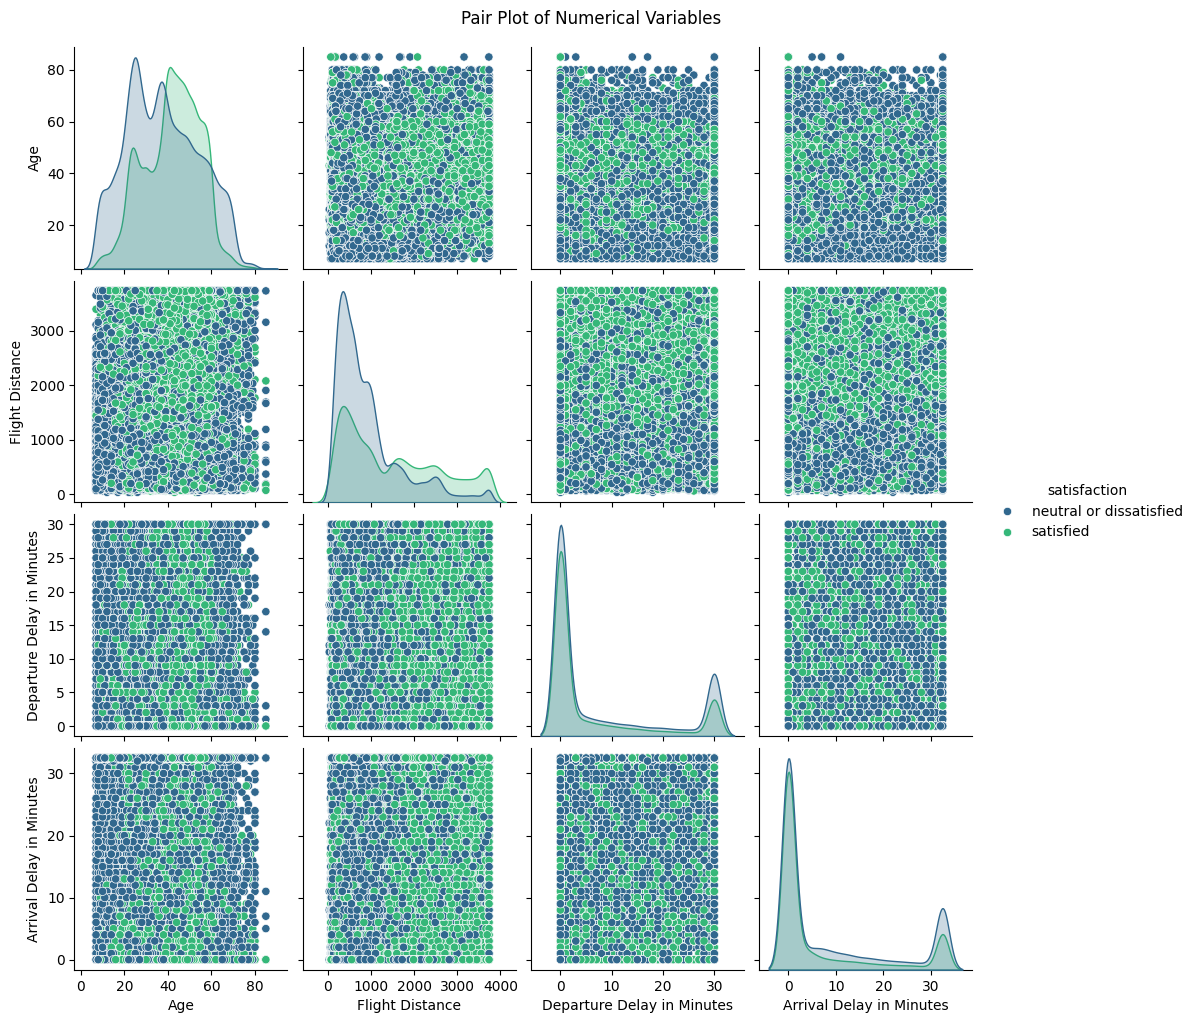

In [168]:
sns.pairplot(df[numerical_columns+[target_column]], hue=target_column, palette='viridis')
plt.suptitle('Pair Plot of Numerical Variables', y=1.02)
plt.show()

Insights

In [169]:
# Majority of people who travel are from Age-group 20–40. This age group is of youngsters like students, working professionals, tourists, business man, etc.
# Most of people only travel for upto 1000km distance. As only tourist people travel for long distances.
# Most of flights are not delayed but if they are delayed they are delayed for more than 30 minutes. Generally flights are delayed due to extreme weather conditions and if weather is bad it generally remains bad for quite a time.
# Female travels slightly more than Males.
# Most of flight customers are loyal which means they have taken thsi flight previously too.
# Most of people travel for business purposes.
# Most people travel in Business and Eco Class. Eco Plus price is generally between these two classes and just offers some basic amenities like leg-room, etc which many people don’t find valuable enough.
# Flight wifi service is average. They should make it better.
# They should focus on their online booking technology as people are facing problem due to this.
# Seat Comfort and Inflight service is also not that good.

 "Feature Engeering"

In [170]:
# make a new column using Feature Construction (using Domain Knowledge)

df['Total Delay'] = df['Departure Delay in Minutes']+df['Arrival Delay in Minutes']
df['Delay Ratio'] = df['Total Delay']/(df['Flight Distance']+1)


In [171]:
df.head(1)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Total Delay,Delay Ratio
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460.0,3,4,3,1,...,3,4,4.0,5,5,25,18.0,neutral or dissatisfied,43.0,0.093275


In [172]:
# Convert Age using Binning

df['Age Group']= pd.cut(df['Age'], bins=[0, 18, 30, 50, 100], labels = ['Children', 'Youngester', 'Adult', 'Senior'])

In [173]:
df['Age Group'].value_counts()

,count
Age Group,
Adult,44402
Senior,26745
Youngester,23848
Children,8909


In [174]:
df.dtypes

,0
Gender,object
Customer Type,object
Age,int64
Type of Travel,object
Class,object
Flight Distance,float64
Inflight wifi service,int64
Departure/Arrival time convenient,int64
Ease of Online booking,int64
Gate location,int64


In [175]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
columns_to_encode =['Gender', 'Customer Type','Type of Travel', 'Class', 'satisfaction', 'Age Group']
label_mappings = {}

In [176]:
for column in columns_to_encode:
  df[column] = le.fit_transform(df[column])
  label_mappings[column] = dict(zip(le.classes_, le.transform(le.classes_)))

for column, mapping in label_mappings.items():
  print(f"Label Mapping for {column}: {mapping}")

Label Mapping for Gender: {'Female': np.int64(0), 'Male': np.int64(1)}
Label Mapping for Customer Type: {'Loyal Customer': np.int64(0), 'disloyal Customer': np.int64(1)}
Label Mapping for Type of Travel: {'Business travel': np.int64(0), 'Personal Travel': np.int64(1)}
Label Mapping for Class: {'Business': np.int64(0), 'Eco': np.int64(1), 'Eco Plus': np.int64(2)}
Label Mapping for satisfaction: {'neutral or dissatisfied': np.int64(0), 'satisfied': np.int64(1)}
Label Mapping for Age Group: {'Adult': np.int64(0), 'Children': np.int64(1), 'Senior': np.int64(2), 'Youngester': np.int64(3)}


In [177]:
  df.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction', 'Total Delay', 'Delay Ratio', 'Age Group'],
      dtype='object')

In [179]:
df.dtypes

,0
Gender,int64
Customer Type,int64
Age,int64
Type of Travel,int64
Class,int64
Flight Distance,float64
Inflight wifi service,int64
Departure/Arrival time convenient,int64
Ease of Online booking,int64
Gate location,int64


In [182]:
df.shape

(103904, 26)

In [181]:
# Feature Selection
from sklearn.model_selection import train_test_split
X = df.drop(columns= ['satisfaction'])
y = df['satisfaction']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [183]:
len(X.columns)

25

In [185]:
from sklearn.feature_selection import mutual_info_classif
# calculate mutual information

mutual_info = mutual_info_classif(X_train, y_train, discrete_features= True)
# create a dataframe for mutual information
mutual_info_df = pd.DataFrame({'Feature': X.columns, 'Mutual Info': mutual_info})
mutual_info_df.sort_values(by= 'Mutual Info', ascending= False, inplace= True)
mutual_info_df

,Feature,Mutual Info
11,Online boarding,0.211611
23,Delay Ratio,0.190751
6,Inflight wifi service,0.161543
4,Class,0.134969
3,Type of Travel,0.113675
13,Inflight entertainment,0.092882
5,Flight Distance,0.084806
12,Seat comfort,0.078537
15,Leg room service,0.060404
14,On-board service,0.057027


In [187]:
top_features = mutual_info_df.head(12)['Feature'].tolist()
top_features

['Online boarding',
 'Delay Ratio',
 'Inflight wifi service',
 'Class',
 'Type of Travel',
 'Inflight entertainment',
 'Flight Distance',
 'Seat comfort',
 'Leg room service',
 'On-board service',
 'Ease of Online booking',
 'Cleanliness']

In [188]:
final_df = df[top_features+['satisfaction']]

In [189]:
final_df.head()

,Online boarding,Delay Ratio,Inflight wifi service,Class,Type of Travel,Inflight entertainment,Flight Distance,Seat comfort,Leg room service,On-board service,Ease of Online booking,Cleanliness,satisfaction
0,3,0.093275,3,2,1,5,460.0,5,3,4,3,5,0
1,3,0.029661,3,0,0,1,235.0,1,5,1,3,1,0
2,5,0.000000,2,0,0,5,1142.0,5,3,4,2,5,1
3,2,0.035524,2,0,0,2,562.0,2,5,2,5,2,0
4,5,0.000000,3,0,0,3,214.0,5,4,3,3,3,1


In [190]:
final_df.shape

(103904, 13)

In [195]:
# Checking Imbalance Data
final_df['satisfaction'].value_counts()

,count
satisfaction,
0,58879
1,45025


In [196]:
final_df['satisfaction'].value_counts().mean()

np.float64(51952.0)

"Model Training"

In [197]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import lightgbm as lgb
import xgboost as xgb

In [198]:
# take the 5% sample data
df_sample= final_df.sample(frac=0.1, random_state=42)


In [199]:
X_sample = final_df.drop(columns= ['satisfaction'])
y_sample = final_df['satisfaction']

In [200]:
# Split the sample data
X_train_sample, X_test_sample, y_train_sample, y_test_sample = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42)

In [202]:
classifiers ={
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'LightGBM': lgb.LGBMClassifier(),
    'XGBoost': xgb.XGBClassifier()
}




In [203]:
# Train and Evaluate each classifiers
results = {}

for name, clf in classifiers.items():
  clf.fit(X_train_sample, y_train_sample)
  y_pred = clf.predict(X_test_sample)
  accuracy = accuracy_score(y_test_sample, y_pred)
  results[name] = accuracy

# print results
for name, accuracy in results.items():
  print(f"{name}: Accuracy = {accuracy:.4f}")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 35957, number of negative: 47166
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003630 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 563
[LightGBM] [Info] Number of data points in the train set: 83123, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.432576 -> initscore=-0.271350
[LightGBM] [Info] Start training from score -0.271350
Logistic Regression: Accuracy = 0.8241
Decision Tree: Accuracy = 0.9213
Random Forest: Accuracy = 0.9430
Gradient Boosting: Accuracy = 0.9268
AdaBoost: Accuracy = 0.8962
SVM: Accuracy = 0.6652
KNN: Accuracy = 0.8617
Naive Bayes: Accuracy = 0.8528
LightGBM: Accuracy = 0.9438
XGBoost: Accuracy = 0.9442


In [207]:
# know that LightGBM is better than other model
 # making LGBM model

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import lightgbm as lgb

In [208]:
x=final_df.drop(columns='satisfaction')
y=final_df['satisfaction']


In [209]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [210]:
lgbm_model = lgb.LGBMClassifier()
lgbm_model.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 35957, number of negative: 47166
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003933 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 563
[LightGBM] [Info] Number of data points in the train set: 83123, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.432576 -> initscore=-0.271350
[LightGBM] [Info] Start training from score -0.271350


LGBMClassifier()

In [211]:
y_pred= lgbm_model.predict(X_test)

In [214]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

In [215]:
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.9438
Precision: 0.9441
Recall: 0.9438
F1 Score: 0.9437


Do not perform the hyperparameter tuning due to overfit risk

# Model Saving


In [219]:
import pickle
with open('lgm_model.pkl', 'wb') as file:
  pickle.dump(lgbm_model, file)

# Model Loading & Testing

In [221]:
with open('/content/lgm_model.pkl', 'rb') as file:
  loaded_model = pickle.load(file)

In [223]:
X_train[8:15]


,Online boarding,Delay Ratio,Inflight wifi service,Class,Type of Travel,Inflight entertainment,Flight Distance,Seat comfort,Leg room service,On-board service,Ease of Online booking,Cleanliness
84550,5,0.000000,4,0,0,2,3736.5,5,2,2,4,3
17315,2,0.000000,2,1,1,3,986.0,3,4,4,2,3
2686,5,0.000585,3,0,0,4,1709.0,4,4,4,3,3
95365,1,0.178571,1,1,1,5,349.0,5,2,3,1,5
12065,1,0.018987,1,1,1,5,631.0,5,3,4,1,5
48204,4,0.004904,2,0,0,4,2038.0,5,4,4,2,3
11348,4,0.000000,4,1,0,4,370.0,4,5,5,4,4


In [224]:
y_train[8:15]

,satisfaction
84550,1
17315,0
2686,1
95365,0
12065,0
48204,1
11348,1


In [225]:
X_new= np.array([[5,	0.000000,	4,	0,	0,	2,	3736.5,	5,	2,	2,	4,	3],
                [2,	0.000000,	2,	1,	1,	3,	986.0,	3,	4,	4,	2,	3]
                ])

In [227]:
y_pred_new= loaded_model.predict(X_new)
y_pred_new

array([1, 0])